In [2]:
import pandas as pd

data = pd.read_csv("LinearRegressionData.csv")

In [2]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
df_x=data.iloc[:,[0]]
df_y=data.iloc[:,[1]]
df_x

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
79,1936
80,1810
81,1987
82,1962


In [4]:
x=df_x.iloc[:,0]
x=pd.to_numeric(x)

y=df_y.iloc[:,0]
y = pd.to_numeric(y)
len(x)
x[1]

1664

Length of result list is  1000
[1.002063221201671, 2.158706433294278, 0.5494324957911939]


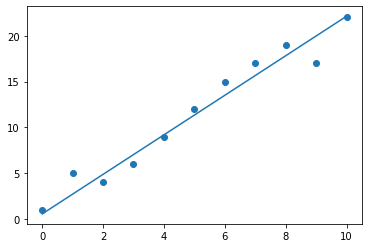

In [62]:
import random
def gradient_descent(x,y):
    result = []
    m = 0 
    c = 0
    alpha = 0.001
    iterations = 1000

    for j in range(iterations):
        
        Total_J = 0
        d_m = 0 # accumulate total gradient in m
        d_c = 0 # accumulate total gradient in c

        for row in range(len(x)): # looping over number of training examples

            # hypothesis function
            hx = m*x[row]+c
            
            # cost function 
            J = ( (hx-y[row])**2 )
            Total_J = Total_J + J

            d_c = d_c + (hx - y[row])
            d_m = d_m + x[row]*(hx - y[row])
        
        Total_J = Total_J/(2*len(x))
        # update m and c 
        temp0 = c - alpha * (d_c/(len(x)))
        temp1 = m - alpha * (d_m/(len(x)))
        c = temp0
        m = temp1
        result.append([Total_J,m,c])

    print('Length of result list is ',len(result))
    # for i in result:
    #     print(i)
    return min(result, key=lambda x: x[0])

    # return [m,c]

X = np.array([i for i in range(11)])
Y = np.array([2*i+random.randint(-2, 3) for i in range(11)])

ans = gradient_descent(X,Y)
print(ans)
plt.scatter(X,Y)
Y2 = ans[1]*X+ans[2]
plt.plot(X,Y2)

C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_10168/3675309402.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.8423739510209609


C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_10168/3675309402.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_10168/3675309402.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


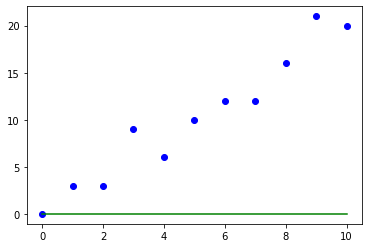

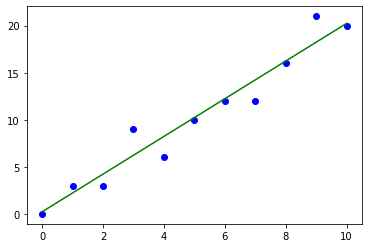

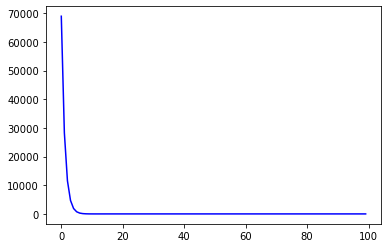

In [63]:
# Implementation of gradient descent in linear regression
# This code borrowed from https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]
	
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		# print("Parameter values ",b)
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	#def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='g')
				f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	for i in range(1,len(Y)):
		Y[i] = Y[i] + random.randint(-2, 3)

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []
	
	#original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
	

	while iterations<1000:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)
		
		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	#final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	#plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])

if __name__ == '__main__':
	main()
